In [2]:
import sklearn
print(sklearn.__version__)

1.5.2


In [3]:
# 도미의 길이, 무게 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

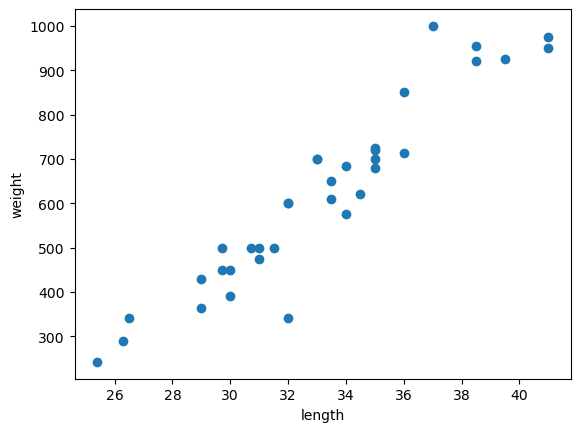

In [5]:
import matplotlib.pyplot as plt
# 산점도를 통해 길이와 무게가 다양하며 길이에 비례해 무게가 증가하는 것을 알 수 있음
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
# 빙어의 무게, 길이 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

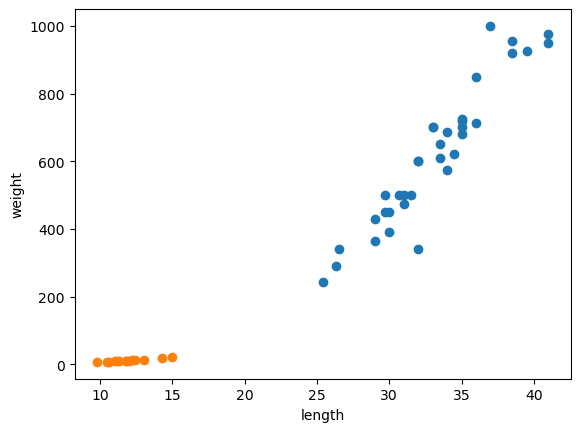

In [8]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 데이터간 길이 및 무게 패턴간 차이가 크다.
# 빙어는 길이 증가에 따라 무게가 많이 증가하지 않는다.

In [11]:
# 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
# 샘플 별 특징을 각 행으로 나타내는 2차원 리스트로 표현
fish_data = [[l, w] for l,w in zip(length, weight)]

In [13]:
# 정답 데이터 준비
# 분류 모델이기 때문에 정답 label 필요
fish_target = [1] * 35 + [0] * 14

### K-최근접 이웃 분류기 클래스 KNeighborsClassifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)
# .score() : 모델이 얼마나 잘 학습되었는지의 지표, 정확도. 0~1사이 값 반환

1.0

데이터에 대한 예측값을 구할 때,주변의 데이터를 보고 다수를 차지하는 것을 정답으로 처리한다.

In [35]:
kn.predict([[30, 600]])
# .predict() : 새로운 샘플에 대한 출력값을 예측

array([1])

최근접 이웃 알고리즘은 엄밀히 말하면 학습이 아니다.  
데이터를 보관하는 것이 전부다.  
데이터가 많아질 경우 주변 데이터와의 거리를 매번 계산하기 때문에 적절하지 않다.

In [24]:
# KNeighborsClassifier는 fit()으로 전달한 데이터에 대해 ._fit_X, ._y 속성이 있다.
print(kn._fit_X)
print(kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


참고하는 이웃 개수 변경하기(default: 5개)  
n_neighbors 매개변수를 변경하여 참조 이웃 수를 변경 가능  
if 49개(도미+빙어) -> 데이터 수가 많은 도미로 "무조건" 예측

In [44]:
kn49 =  KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [31]:
print(35/49)

0.7142857142857143


n_neighbors=49일 때 .score()값과 도미(35) / 49 의 값이 동일하다.  
정확도 측정 결과 도미의 데이터 비율과 일치한다.

---

#### 데이터 준비

In [23]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#### 샘플 데이터 합치기

In [24]:
import numpy as np
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [25]:
# 이전에 사용한 방법: fish_data =[[l,w] for l,w in zip(fish_length, fish_weight)]
fish_data = np.column_stack((fish_length, fish_weight))
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

#### 타깃 데이터 합치기

In [26]:
# 이전에 사용한 방법: fish_target = [1]*35 + [0]*14
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [30]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


도미와 빙어가 잘 섞였는지 출력해본다.

In [31]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


도미(1) 빙어(0)의 비율이 3.3 : 1로 나타난다.  
실제 도미와 빙어 개수는 35, 14개로 2.5 : 1 비율이다.  
**샘플링 편향** 이 일부 나타났음을 알 수 있다.

train_test_split()의 stratify 매개변수: 클래스 비율에 맞게 데이터 분할 가능

In [32]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42, stratify=fish_target)

print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


2.25(9개) : 1(4개) 비율로 샘플링 편향이 줄었다.

#### 새로운 분할 데이터로 모델 학습하기

In [33]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

이전에 분류를 잘 하지 못했던 생선(실제로 도미)를 입력으로 넣어 예측 수행

In [35]:
print(kn.predict([[25,150]]))

[0.]


여전히 빙어로 예측중.

### 데이터 시각화해서 살펴보기

In [36]:
import matplotlib.pyplot as plt

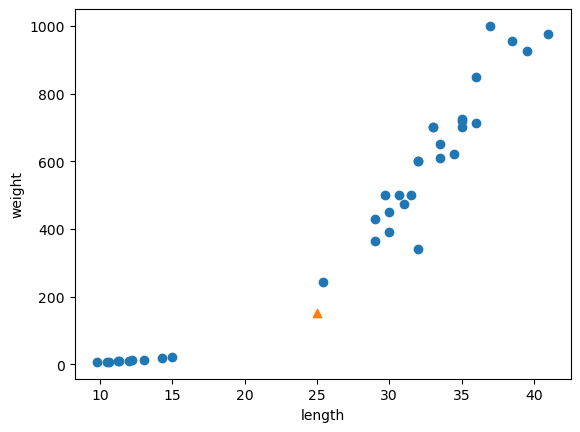

In [37]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

k-최근접 이웃 분류기는 **k개 이웃을 참조해 예측 수행**  

In [38]:
distances, indexes = kn.kneighbors([[25,150]])

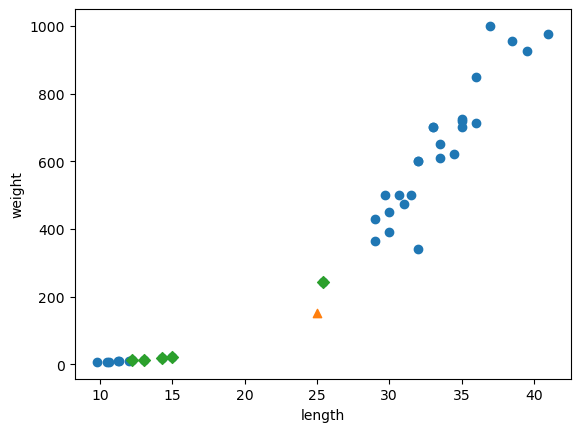

In [39]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D') ##
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

눈으로 보기엔 도미쪽이지만, 참조한 데이터의 다수가 빙어 샘플이었음

In [41]:
print(train_input[indexes])
print(train_target[indexes]) # 참조한 샘플 직접 확인

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]


#### 이웃으로 판별된 샘플과의 거리 살펴보기

kneighbors() 메서드에서 반환한 distances 배열은 **예측 대상<->이웃 간의 거리 배열**

In [43]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


#### 범위 고정시켜서 시각화하기

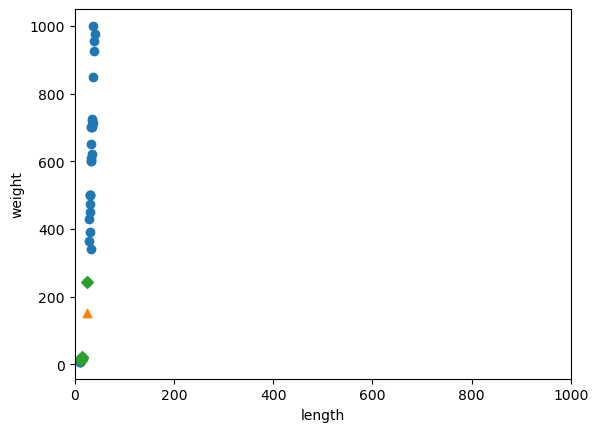

In [44]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000)) ##
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

산점도가 한쪽에 쏠림. 데이터 범위(scale)이 달라 나타나는 문제.  
x축(length)은 큰 영향을 미치지 못할 것이다.

### 데이터 전처리

데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다.  
- 특히, 거리 기반의 알고리즘(k-최근접 이웃 등)이 큰 영향을 받는다.  
- 데이터 전처리(data preprocessing): 실험 전 적절한 형태로 만들어 주는 작업을 의
미한다.  
- 데이터 정규화(data normalization): 특성 값을 일정한 기준으로 맞춰주는 작업. 데
이터 전처리에 속한다.

#### 표준점수를 이용한 데이터 정규화
모든 특징이 평균 0, 분산 1에 가깝게 변환

In [45]:
mean = np.mean(train_input, axis = 0) # 행(axis=0)기준으로 함수 적용
std = np.std(train_input, axis = 0)

In [46]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [49]:
train_scaled =(train_input - mean) / std
train_scaled[:5]

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528]])

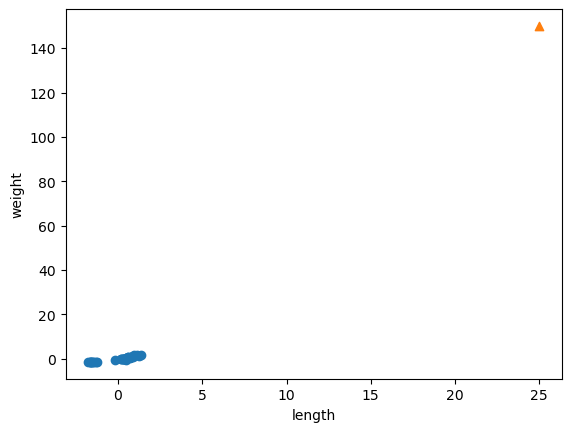

In [50]:
plt.scatter(train_scaled[:, 0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 새로운 샘플에 대한 전처리
표준점수 전처리가 적용되지 않아 위와 같이 이상하게 나옴  
표준점수 적용하기  
* 유의점: 훈련 세트를 사용할 때 계산한 평균과 표준편차 이용

In [51]:
new = ([25, 150] - mean) / std

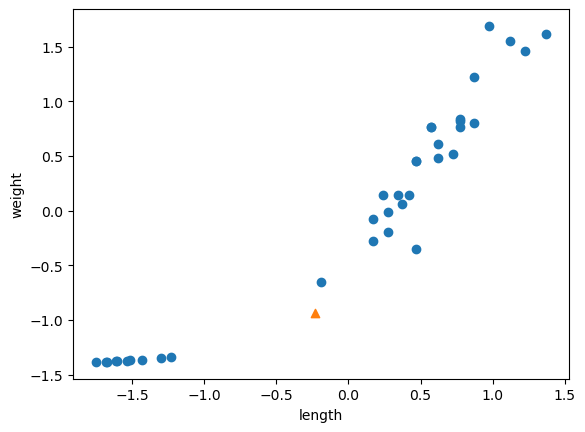

In [59]:
plt.scatter(train_scaled[:, 0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^') ##
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 전처리 완료 데이터로 훈련 및 예측
잘 예측이 될 것이다.

In [60]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [61]:
test_scaled = (test_input - mean) / std

In [62]:
kn.score(test_scaled, test_target)

1.0

In [63]:
print(kn.predict([new]))

[1.]


In [64]:
distances, indexes = kn.kneighbors([new])

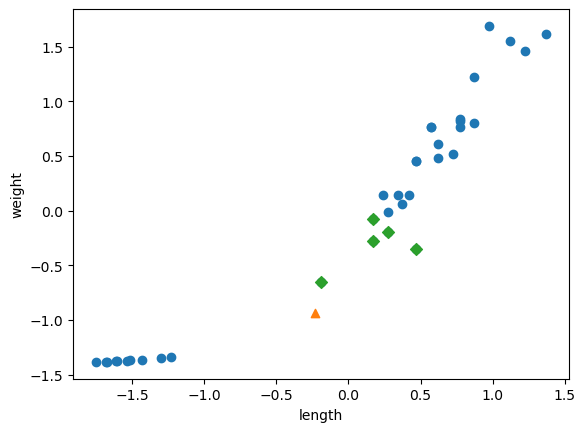

In [65]:
plt.scatter(train_scaled[:, 0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D') ##
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

도미로 예측!

### 특성 전처리의 중요성
전처리 시 유의사항은 **훈련세트를 변환할 때 사용한 값**을 사용해야 한다는 것이다.  
최대-최소 정규화 등에서도 동일하게 적용되는 원칙이다.

- 데이터 전처리(data preprocessing): 머신러닝 모델에 훈련 데이터를 주입하기 전 가공 단계
- 표준 점수(z-score): 훈련 세트의 스케일을 바꾸는 대표적인 방법, 대중적인 표준점수 구하는 식으로 구함

---